In [71]:
import pandas as pd
from statistics import variance
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import ttest_1samp
from scipy.stats import t

In [4]:
sensor_a = pd.read_excel('./hw_1_data/HEAT - A_final.xls', skiprows = 3).drop([0])
sensor_b = pd.read_excel('./hw_1_data/HEAT - B_final.xls', skiprows = 3).drop([0])
sensor_c = pd.read_excel('./hw_1_data/HEAT - C_final.xls', skiprows = 3).drop([0])
sensor_d = pd.read_excel('./hw_1_data/HEAT - D_final.xls', skiprows = 3).drop([0])
sensor_e = pd.read_excel('./hw_1_data/HEAT - E_final.xls', skiprows = 3).drop([0])

In [5]:
sensor_a

,FORMATTED DATE-TIME,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
1,2020-06-10 00:00:00,327.0,0.7,0.4,0.6,9.9,8.3,9.8,69.9,9.4,4.6,7.3,1021,1021,-66,-234,7.5,7.9,320,327
2,2020-06-10 00:20:00,323.0,0.7,0.4,0.6,9.8,7.8,9.7,70.9,9.3,4.7,7.2,1020.8,1020.7,-64,-235,7.2,7.6,320,322
3,2020-06-10 00:40:00,325.0,0,0,0,9.3,7.7,9.2,73.5,8.9,4.8,7.1,1020.6,1020.5,-63,-251,7.3,7.6,320,325
4,2020-06-10 01:00:00,322.0,0.6,0.4,0.5,9,7.2,9,75.6,8.8,4.9,7,1020.5,1020.5,-62,-260,6.9,7.2,320,321
5,2020-06-10 01:20:00,321.0,0.7,0.4,0.5,9.4,7.3,9.4,74.9,9.1,5.2,7.2,1020.2,1020.2,-60,-240,6.9,7.2,320,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2020-07-14 07:40:00,140.0,0.8,0.5,-0.7,17.2,17.1,17.2,95.4,17.7,16.5,16.8,1016.8,1016.7,-32,116,16.7,16.8,273.3,140
2473,2020-07-14 08:00:00,144.0,0,0,0,17.6,18.8,17.6,94.8,18.1,16.8,17.1,1016.7,1016.7,-31,132,16.7,17.2,320,144
2474,2020-07-14 08:20:00,141.0,1.3,0.8,-1,17.5,19.8,17.5,95,18,16.7,17,1016.6,1016.5,-29,130,16.9,17.6,320,140
2475,2020-07-14 08:40:00,160.0,1.9,0.7,-1.8,17.6,20.3,17.5,96,18.1,17,17.2,1016.5,1016.5,-29,135,17.1,17.8,320,160


In [6]:
to_numeric_columns = ['Direction ‚ True', 'Wind Speed',
       'Crosswind Speed', 'Headwind Speed', 'Temperature', 'Globe Temperature',
       'Wind Chill', 'Relative Humidity', 'Heat Stress Index', 'Dew Point',
       'Psychro Wet Bulb Temperature', 'Station Pressure',
       'Barometric Pressure', 'Altitude', 'Density Altitude',
       'NA Wet Bulb Temperature', 'WBGT', 'TWL', 'Direction ‚ Mag']

In [7]:
sensor_a[to_numeric_columns] = sensor_a[to_numeric_columns].apply(pd.to_numeric)
sensor_a['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_a['FORMATTED DATE-TIME'])
#sensor_a.set_index('FORMATTED DATE-TIME')

In [8]:
sensor_b[to_numeric_columns] = sensor_b[to_numeric_columns].apply(pd.to_numeric)
sensor_b['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_b['FORMATTED DATE-TIME'])
#sensor_b.set_index('FORMATTED DATE-TIME')

In [9]:
sensor_c[to_numeric_columns] = sensor_c[to_numeric_columns].apply(pd.to_numeric)
sensor_c['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_c['FORMATTED DATE-TIME'])
#sensor_c.set_index('FORMATTED DATE-TIME')

In [10]:
sensor_d[to_numeric_columns] = sensor_d[to_numeric_columns].apply(pd.to_numeric)
sensor_d['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_d['FORMATTED DATE-TIME'])
#sensor_d.set_index('FORMATTED DATE-TIME')

In [11]:
sensor_e[to_numeric_columns] = sensor_e[to_numeric_columns].apply(pd.to_numeric)
sensor_e['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_e['FORMATTED DATE-TIME'])
#sensor_e.set_index('FORMATTED DATE-TIME')

In [12]:
sensor_a.dtypes

FORMATTED DATE-TIME             datetime64[ns]
Direction ‚ True                       float64
Wind Speed                             float64
Crosswind Speed                        float64
Headwind Speed                         float64
Temperature                            float64
Globe Temperature                      float64
Wind Chill                             float64
Relative Humidity                      float64
Heat Stress Index                      float64
Dew Point                              float64
Psychro Wet Bulb Temperature           float64
Station Pressure                       float64
Barometric Pressure                    float64
Altitude                                 int64
Density Altitude                         int64
NA Wet Bulb Temperature                float64
WBGT                                   float64
TWL                                    float64
Direction ‚ Mag                          int64
dtype: object

In [13]:
sensor_list = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
name_list = ['sensor_a','sensor_b', 'sensor_c', 'sensor_d', 'sensor_e']

In [14]:
i = 0
mean_dict = {} 
for sensor in sensor_list:
    mean_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        mean = sensor[measurement].mean()
        mean_list.append(mean)
    mean_dict.update({sensor_name : mean_list})
    i += 1

mean_df = pd.DataFrame.from_dict(mean_dict, orient = 'index', columns = to_numeric_columns)

    

In [15]:
i = 0
var_dict = {} 
for sensor in sensor_list:
    var_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        var = variance(sensor[measurement])
        var_list.append(var)
    var_dict.update({sensor_name : var_list})
    i += 1

var_df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = to_numeric_columns)

    

In [16]:
i = 0
std_dict = {} 
for sensor in sensor_list:
    std_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        stdev = np.std(sensor[measurement])
        std_list.append(stdev)
    std_dict.update({sensor_name : std_list})
    i += 1

std_df = pd.DataFrame.from_dict(std_dict, orient = 'index', columns = to_numeric_columns)



In [17]:
Wind_speed = pd.concat([sensor_a['Wind Speed'], sensor_b['Wind Speed'], sensor_c['Wind Speed'],
                       sensor_d['Wind Speed'], sensor_e['Wind Speed']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

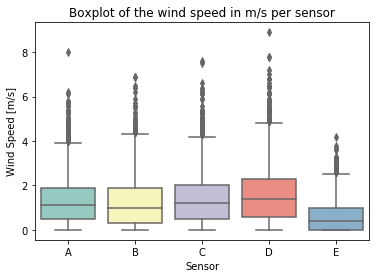

In [18]:
ax = sns.boxplot(data=Wind_speed, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Speed [m/s]', 
      title = 'Boxplot of the wind speed in m/s per sensor')
plt.savefig('Boxplot of wind speed')

In [74]:
Temperature = pd.concat([sensor_a['Temperature'], sensor_b['Temperature'], sensor_c['Temperature'],
                       sensor_d['Temperature'], sensor_e['Temperature']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

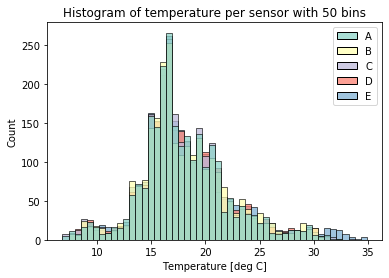

In [75]:
ax = sns.histplot(data=Temperature, bins = 50, palette="Set3", multiple="stack")
ax.set(title = 'Histogram of temperature per sensor with 50 bins', xlabel = 'Temperature [deg C]')
plt.savefig('Histogram of temperature per sensor with 50 bins')

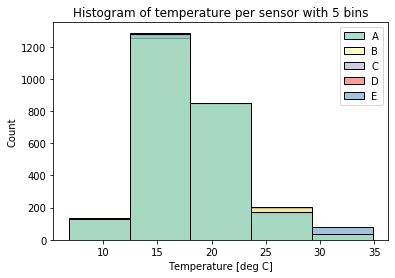

In [76]:
ax = sns.histplot(data=Temperature, bins = 5, palette="Set3", multiple="stack")
ax.set(title = 'Histogram of temperature per sensor with 5 bins', xlabel = 'Temperature [deg C]')
plt.savefig('Histogram of temperature per sensor with 5 bins')

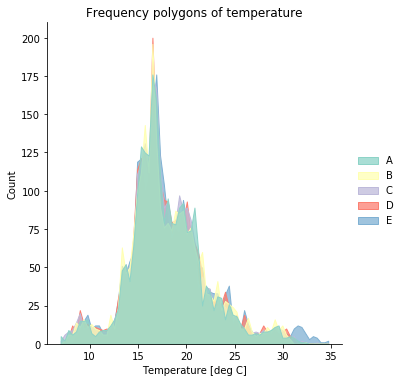

In [77]:
ax = sns.displot(data=Temperature, element = 'poly', palette="Set3",
                 multiple="stack")
ax.set(title = 'Frequency polygons of temperature', xlabel = 'Temperature [deg C]')
plt.savefig('polygon hist temperature')

In [78]:
wind_direction = pd.concat([sensor_a['Direction ‚ True'], sensor_b['Direction ‚ True'], 
                        sensor_c['Direction ‚ True'], sensor_d['Direction ‚ True'], 
                        sensor_e['Direction ‚ True']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

In [79]:
wind_direction

,A,B,C,D,E
1,327.0,346,4.0,334.0,62.0
2,323.0,351,5.0,334.0,72.0
3,325.0,15,6.0,333.0,73.0
4,322.0,16,3.0,331.0,73.0
5,321.0,21,4.0,332.0,232.0
...,...,...,...,...,...
2472,140.0,163,165.0,154.0,250.0
2473,144.0,133,164.0,153.0,250.0
2474,141.0,107,143.0,162.0,250.0
2475,160.0,127,NaN,NaN,248.0


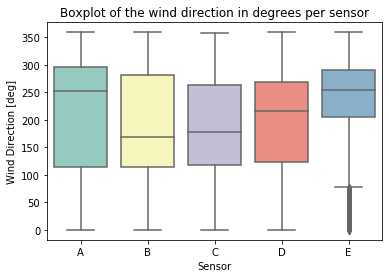

In [80]:
ax = sns.boxplot(data=wind_direction, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Direction [deg]',
      title = 'Boxplot of the wind direction in degrees per sensor')
plt.savefig('Boxplot of the wind direction in degrees per sensor') 

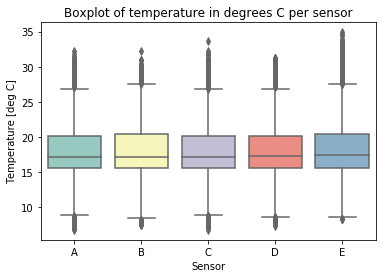

In [81]:
ax = sns.boxplot(data=Temperature, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Temperature [deg C]', 
       title = 'Boxplot of temperature in degrees C per sensor')
plt.savefig('Boxplot of temperature per sensor') 

## A2

##### Temperature

In [82]:
pmf_a = sensor_a['Temperature'].value_counts().sort_index() / len(sensor_a['Temperature'])
pmf_b = sensor_b['Temperature'].value_counts().sort_index() / len(sensor_b['Temperature'])
pmf_c = sensor_c['Temperature'].value_counts().sort_index() / len(sensor_c['Temperature'])
pmf_d = sensor_d['Temperature'].value_counts().sort_index() / len(sensor_d['Temperature'])
pmf_e = sensor_e['Temperature'].value_counts().sort_index() / len(sensor_e['Temperature'])

In [83]:
#df1 = pd.DataFrame(data=pmf_as.index, columns=['Temperature [deg C]'])
#df2 = pd.DataFrame(data=pmf_as.values, columns=['P'])
#pmf_a = pd.merge(df1, df2, left_index=True, right_index=True)

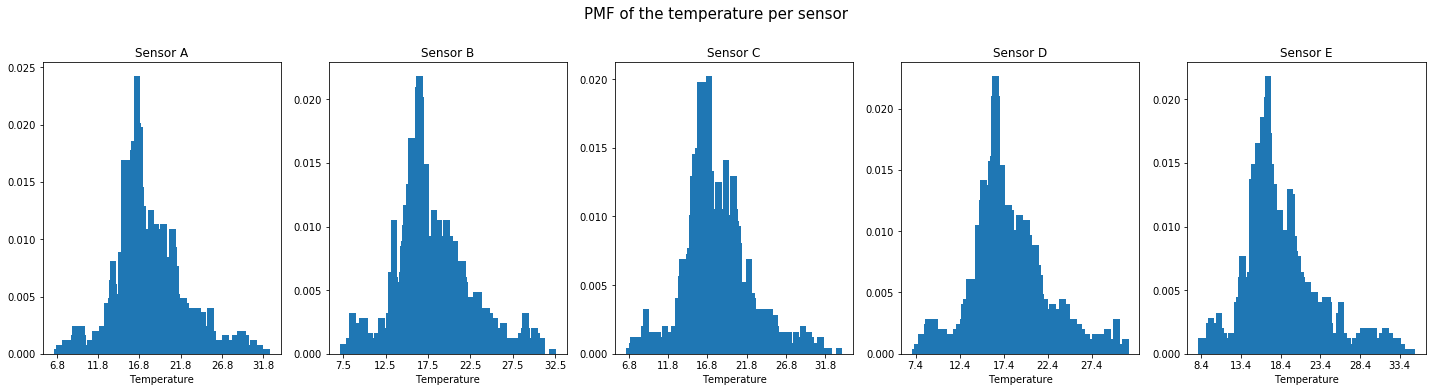

In [84]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.bar(pmf_a.index, pmf_a.values)
plt.title('Sensor A')
plt.xlabel('Temperature')
plt.xticks(np.arange(min(sensor_a.Temperature), max(sensor_a.Temperature)+1, 5.0))


plt.sca(axes[1])
plt.bar(pmf_b.index, pmf_b.values)
plt.title('Sensor B')
plt.xlabel('Temperature')
plt.xticks(np.arange(min(sensor_b.Temperature), max(sensor_b.Temperature)+1, 5.0))

plt.sca(axes[2])
plt.bar(pmf_c.index, pmf_c.values)
plt.title('Sensor C')
plt.xlabel('Temperature')
plt.xticks(np.arange(min(sensor_c.Temperature), max(sensor_c.Temperature)+1, 5.0))
plt.yticks([0.000, 0.005, 0.010, 0.015, 0.020])

plt.sca(axes[3])
plt.bar(pmf_d.index, pmf_d.values)
plt.title('Sensor D')
plt.xlabel('Temperature')
plt.xticks(np.arange(min(sensor_d.Temperature), max(sensor_d.Temperature)+1, 5.0))

plt.sca(axes[4])
plt.bar(pmf_e.index, pmf_e.values)
plt.title('Sensor E')
plt.xlabel('Temperature')
plt.xticks(np.arange(min(sensor_e.Temperature), max(sensor_e.Temperature)+1, 5.0))


fig.suptitle('PMF of the temperature per sensor', fontsize = 15, y = 1.08)
plt.tight_layout()
plt.savefig('PMF of temperature per sensor') 

#### PDF

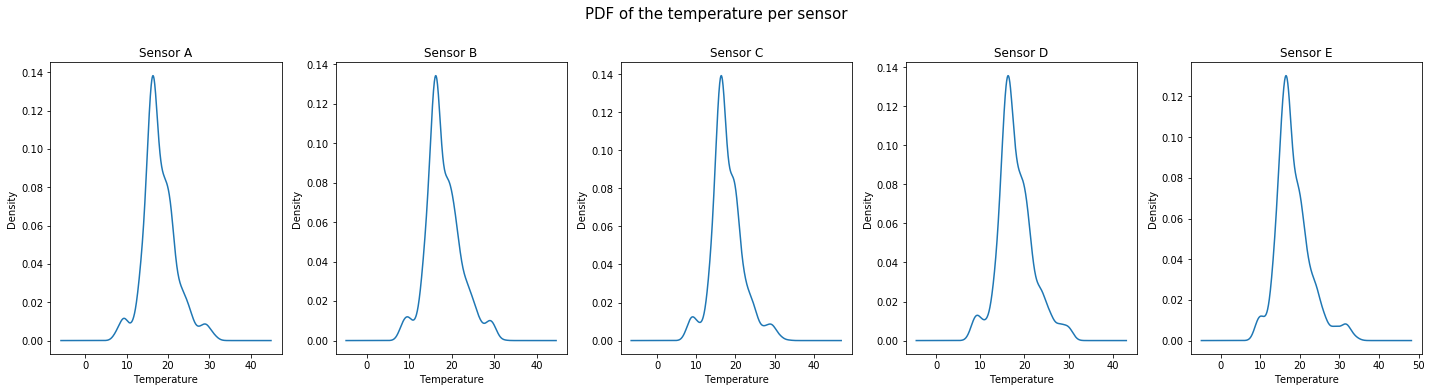

In [85]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
ax = sensor_a['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor A')

plt.sca(axes[1])
ax = sensor_b['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor B')

plt.sca(axes[2])
ax = sensor_c['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor C')

plt.sca(axes[3])
ax = sensor_d['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor D')

plt.sca(axes[4])
ax = sensor_e['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor E')

plt.tight_layout()
fig.suptitle('PDF of the temperature per sensor', fontsize = 15, y = 1.08)

plt.savefig('PDF of temperature per sensor') 

### CDF

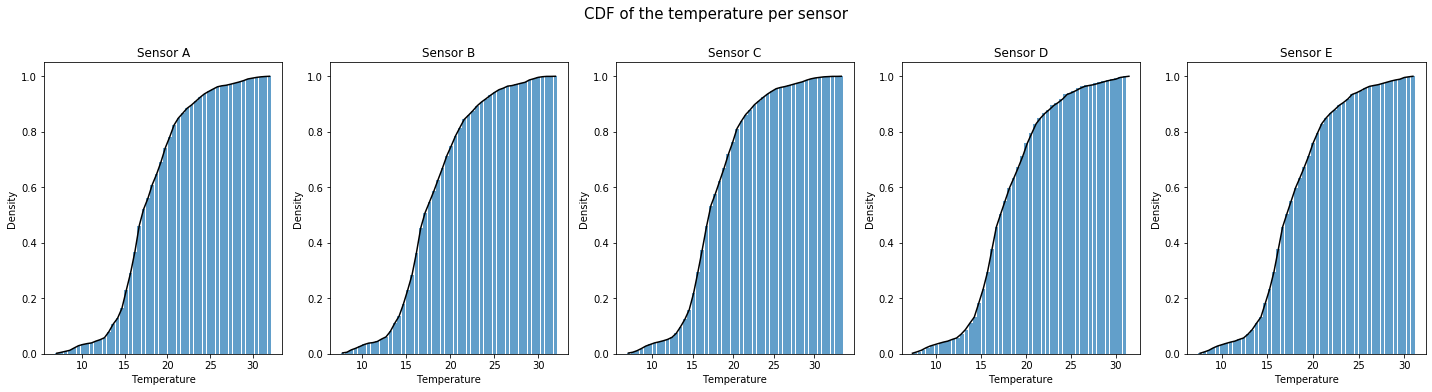

In [86]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
a1 = plt.hist(x=sensor_a['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(a1[1][1:]-(a1[1][1:]-a1[1][:-1])/2,a1[0], color='k')
plt.title('Sensor A')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[1])
b1 = plt.hist(x=sensor_b['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(b1[1][1:]-(b1[1][1:]-b1[1][:-1])/2,b1[0], color='k')
plt.title('Sensor B')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[2])
c1 = plt.hist(x=sensor_c['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(c1[1][1:]-(c1[1][1:]-c1[1][:-1])/2,c1[0], color='k')
plt.title('Sensor C')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[3])
d1 = plt.hist(x=sensor_d['Temperature'], bins=50, cumulative=True, density = True ,alpha=0.7, rwidth=0.85)
plt.plot(d1[1][1:]-(d1[1][1:]-a1[1][:-1])/2,d1[0], color='k')
plt.title('Sensor D')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[4])
e1 = plt.hist(x=sensor_d['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(e1[1][1:]-(e1[1][1:]-e1[1][:-1])/2,e1[0], color='k')
plt.title('Sensor E')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.tight_layout()
fig.suptitle('CDF of the temperature per sensor', fontsize = 15, y = 1.08)
plt.savefig('CDF of temperature per sensor') 

### Windspeed

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

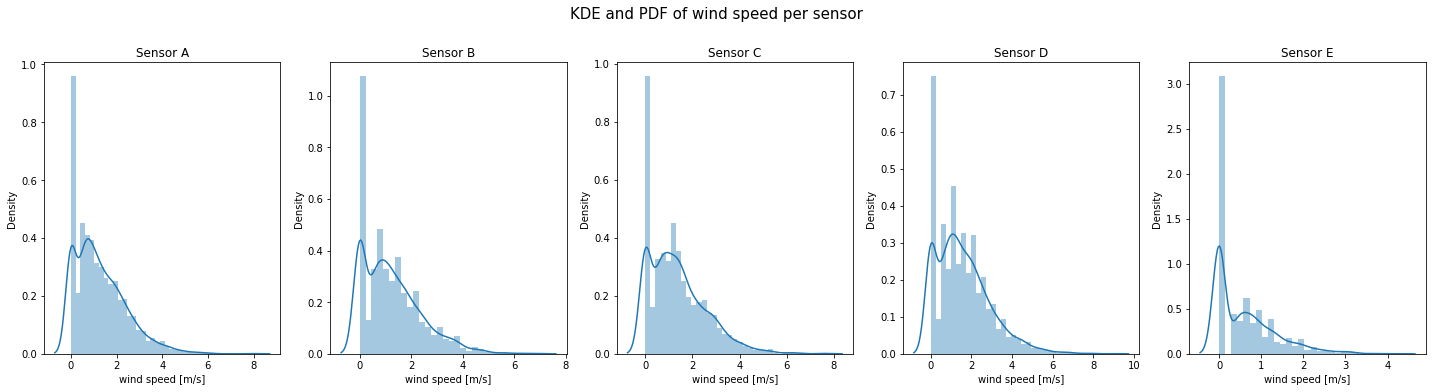

In [87]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))

plt.sca(axes[0])
ax = sns.distplot(Wind_speed.A, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor A')

plt.sca(axes[1])
ax = sns.distplot(Wind_speed.B, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor B')

plt.sca(axes[2])
ax = sns.distplot(Wind_speed.C, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor C')

plt.sca(axes[3])
ax = sns.distplot(Wind_speed.D, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor D')

plt.sca(axes[4])
ax = sns.distplot(Wind_speed.E, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor E')

plt.tight_layout()
fig.suptitle('KDE and PDF of wind speed per sensor', fontsize = 15, y = 1.08)

plt.savefig('KDE and PDF of wind speed per sensor') 

### A3

make of equal lenght 

In [88]:
Wet_Bulb_Globe = pd.concat([sensor_a['WBGT'], sensor_b['WBGT'], 
                        sensor_c['WBGT'], sensor_d['WBGT'], 
                        sensor_e['WBGT']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

In [89]:
Crosswind_speed = pd.concat([sensor_a['Crosswind Speed'], sensor_b['Crosswind Speed'], 
                        sensor_c['Crosswind Speed'], sensor_d['Crosswind Speed'], 
                        sensor_e['Crosswind Speed']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

In [90]:
# make correlations 

In [91]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_W = {} 
spearman_dict_W = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Wet_Bulb_Globe[sensor1], Wet_Bulb_Globe[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_W[key] = pearson

            spearman, _ = stats.spearmanr(Wet_Bulb_Globe[sensor1], Wet_Bulb_Globe[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_W[key] = spearman
    sensor_list.remove(sensor1)
        

In [92]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_T = {} 
spearman_dict_T = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Temperature[sensor1], Temperature[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_T[key] = pearson
            
            spearman, _ = stats.spearmanr(Temperature[sensor1], Temperature[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_T[key] = spearman
    sensor_list.remove(sensor1)

In [93]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_C = {} 
spearman_dict_C = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Crosswind_speed[sensor1], Crosswind_speed[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_C[key] = pearson

            spearman, _ = stats.spearmanr(Crosswind_speed[sensor1], Crosswind_speed[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_C[key] = spearman
    sensor_list.remove(sensor1)

In [94]:
spearman_dict_T

{'AxB': 0.9873816048765109,
 'AxC': 0.9880913733962015,
 'AxD': 0.9843597065082936,
 'AxE': 0.971679562373189,
 'BxC': 0.9852451592225194,
 'BxD': 0.9857684913050068,
 'BxE': 0.9767727006658334,
 'CxD': 0.9881855891390963,
 'CxE': 0.9769209774377852,
 'DxE': 0.9753775047693783}

In [116]:
sensor_list = ['A', 'B', 'C', 'D', 'E']

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

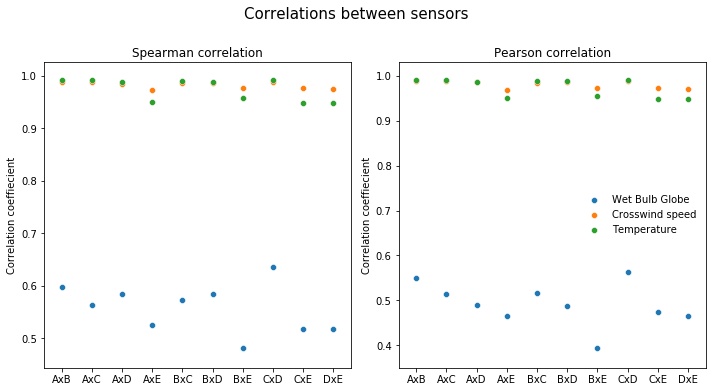

In [340]:
x = list(spearman_dict_C.keys())
y_cs = list(spearman_dict_C.values())
y_ts = list(spearman_dict_T.values())
y_ws = list(spearman_dict_W.values())
y_cp = list(pearson_dict_C.values())
y_tp = list(pearson_dict_T.values())
y_wp = list(pearson_dict_W.values())

fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

plt.sca(axes[0])
ax = sns.scatterplot(x, y_cs)
ax = sns.scatterplot(x, y_ts)
ax = sns.scatterplot(x, y_ws)
ax.set(ylabel = 'Correlation coeffiecient')
plt.title('Spearman correlation')

plt.sca(axes[1])
ax = sns.scatterplot(x, y_cp)
ax = sns.scatterplot(x, y_tp)
ax = sns.scatterplot(x, y_wp)
ax.set(ylabel = 'Correlation coeffiecient')
plt.title('Pearson correlation')

plt.legend(labels=['Wet Bulb Globe', 'Crosswind speed', 'Temperature'], frameon=False)

plt.tight_layout()
fig.suptitle('Correlations between sensors', fontsize = 15, y = 1.08)

plt.savefig('KDE and PDF of wind speed per sensor') 

## A4

In [348]:
#CDFs 

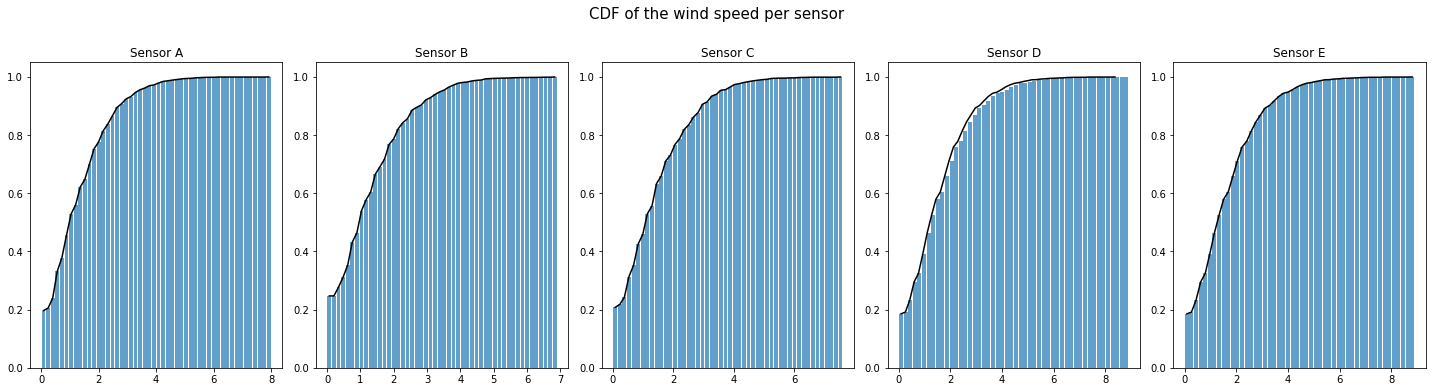

In [349]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
a1 = plt.hist(x=sensor_a['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(a1[1][1:]-(a1[1][1:]-a1[1][:-1])/2,a1[0], color='k')
plt.title('Sensor A')

plt.sca(axes[1])
b1 = plt.hist(x=sensor_b['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(b1[1][1:]-(b1[1][1:]-b1[1][:-1])/2,b1[0], color='k')
plt.title('Sensor B')

plt.sca(axes[2])
c1 = plt.hist(x=sensor_c['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(c1[1][1:]-(c1[1][1:]-c1[1][:-1])/2,c1[0], color='k')
plt.title('Sensor C')

plt.sca(axes[3])
d1 = plt.hist(x=sensor_d['Wind Speed'], bins=50, cumulative=True, density = True ,alpha=0.7, rwidth=0.85)
plt.plot(d1[1][1:]-(d1[1][1:]-a1[1][:-1])/2,d1[0], color='k')
plt.title('Sensor D')

plt.sca(axes[4])
e1 = plt.hist(x=sensor_d['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(e1[1][1:]-(e1[1][1:]-e1[1][:-1])/2,e1[0], color='k')
plt.title('Sensor E')

plt.tight_layout()
fig.suptitle('CDF of the wind speed per sensor', fontsize = 15, y = 1.08)
plt.savefig('CDF of wind speed per sensor') 

In [124]:
sensor_names = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
lower_list = []
upper_list = []

for sensor in sensor_names: 
    mean = np.mean(sensor['Temperature'])
    std = np.std(sensor['Temperature'])
    sample_size = len(sensor['Temperature'])
    lower, upper = stats.t.interval(0.95, sample_size-1, loc=mean, scale= std)

    lower_list.append(lower)
    upper_list.append(upper)
    

In [125]:
df_temp_intervals = pd.DataFrame([sensor_list, lower_list, upper_list]).transpose()

In [126]:
df_temp_intervals.columns = ['Sensor', 'Lower boundary', 'Upper boundary']

In [127]:
df_temp_intervals

,Sensor,Lower boundary,Upper boundary
0,A,10.1603,25.7779
1,B,10.0706,26.0602
2,C,10.0455,25.7808
3,D,10.1284,25.8643
4,E,9.79851,26.9094


In [162]:
df_temp_intervals.to_csv('confidence_intervals_temperatures.csv')

In [144]:
sensor_names = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
lower_list_WS = []
upper_list_WS = []

for sensor in sensor_names: 
    mean = np.mean(sensor['Wind Speed'])
    std = np.std(sensor['Wind Speed'])
    sample_size = len(sensor['Wind Speed'])
    lower, upper = stats.t.interval(0.95, sample_size-1, loc=mean, scale= std)

    lower_list_WS.append(lower)
    upper_list_WS.append(upper)

In [145]:
df_windspeed_intervals = pd.DataFrame([sensor_list, 
                                  lower_list_WS, 
                                  upper_list_WS]).transpose()
df_windspeed_intervals.columns = ['Sensor', 'Lower boundary', 
                                  'Upper boundary']

In [146]:
df_windspeed_intervals

,Sensor,Lower boundary,Upper boundary
0,A,-0.901568,3.48218
1,B,-0.993417,3.47767
2,C,-0.972593,3.71552
3,D,-1.00306,4.16636
4,E,-0.804851,1.99734


In [160]:
df_windspeed_intervals.to_csv('confidence_intervals_windspeed.csv')

In [157]:

confidence = 0.95
n = len(sensor_a['Wind Speed'])
m = np.mean(sensor_a['Wind Speed'])
std_err = stats.sem(sensor_a['Wind Speed'])
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

In [158]:
m - h

1.2462270389909704

In [159]:
m + h

1.334386854385442